In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import glob
from natsort import natsorted

In [240]:
Nx = 500
x1 = -20.0
x2 = 20
X  = np.linspace(x1,x2,num=Nx, dtype=np.float32)

# Post-Process

In [241]:
loss= np.loadtxt('./GL_NN/output.dat',unpack = True)

Text(0, 0.5, 'Loss')

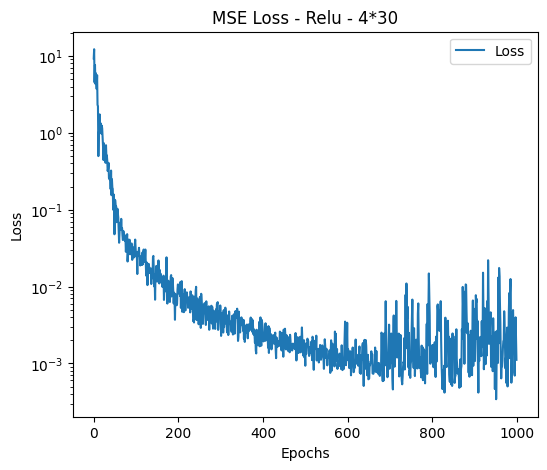

In [242]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)

ax.set_yscale('log')

# Surface Plot

ax.plot(loss[0],loss[1])

ax.legend(['Loss'])

# Labels
plt.title("MSE Loss - Relu - 4*30")
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')

In [243]:
u = np.load("./GL_NN/U",allow_pickle=True)
v = np.load("./GL_NN/V",allow_pickle=True)

In [244]:
u[500:]

array([], dtype=float32)

Text(0, 0.5, 'Value')

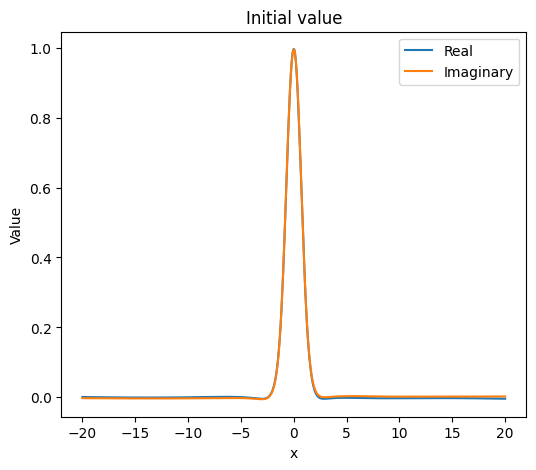

In [245]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)

# Surface Plot

ax.plot(X,u)
ax.plot(X,v)

ax.legend(['Real', 'Imaginary'])

# Labels
plt.title("Initial value")
ax.set_xlabel('x')
ax.set_ylabel('Value')

In [256]:
u_list = natsorted(glob.glob('./GL_NN/U*'))
v_list = natsorted(glob.glob('./GL_NN/V*'))

x_list = natsorted(glob.glob('./GL_NN/X*'))

In [257]:
u_list

['./GL_NN/U',
 './GL_NN/U1',
 './GL_NN/U2',
 './GL_NN/U3',
 './GL_NN/U4',
 './GL_NN/U5',
 './GL_NN/U6',
 './GL_NN/U7',
 './GL_NN/U8',
 './GL_NN/U9',
 './GL_NN/U10',
 './GL_NN/U11',
 './GL_NN/U12',
 './GL_NN/U13',
 './GL_NN/U14',
 './GL_NN/U15',
 './GL_NN/U16',
 './GL_NN/U17',
 './GL_NN/U18',
 './GL_NN/U19',
 './GL_NN/U20',
 './GL_NN/U21',
 './GL_NN/U22',
 './GL_NN/U23',
 './GL_NN/U24',
 './GL_NN/U25',
 './GL_NN/U26',
 './GL_NN/U27',
 './GL_NN/U28',
 './GL_NN/U29',
 './GL_NN/U30',
 './GL_NN/U31',
 './GL_NN/U32',
 './GL_NN/U33',
 './GL_NN/U34',
 './GL_NN/U35',
 './GL_NN/U36',
 './GL_NN/U37',
 './GL_NN/U38',
 './GL_NN/U39',
 './GL_NN/U40',
 './GL_NN/U41',
 './GL_NN/U42',
 './GL_NN/U43',
 './GL_NN/U44',
 './GL_NN/U45',
 './GL_NN/U46',
 './GL_NN/U47',
 './GL_NN/U48',
 './GL_NN/U49',
 './GL_NN/U50',
 './GL_NN/U51',
 './GL_NN/U52',
 './GL_NN/U53',
 './GL_NN/U54',
 './GL_NN/U55',
 './GL_NN/U56',
 './GL_NN/U57',
 './GL_NN/U58',
 './GL_NN/U59',
 './GL_NN/U60',
 './GL_NN/U61',
 './GL_NN/U62',
 '.

/var/folders/8j/7mx8fh612vn6fnsw42p34gd40000gp/T/ipykernel_3552/823705659.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(6,5))


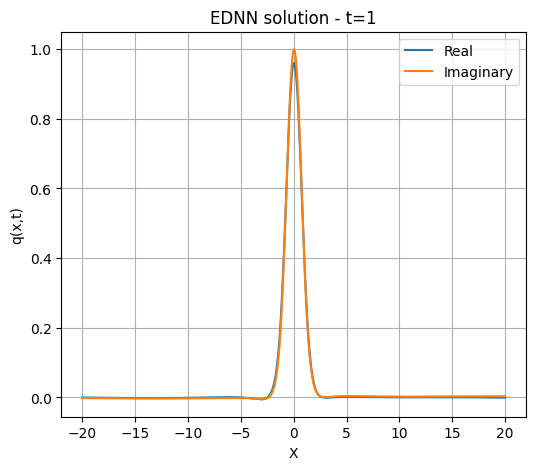

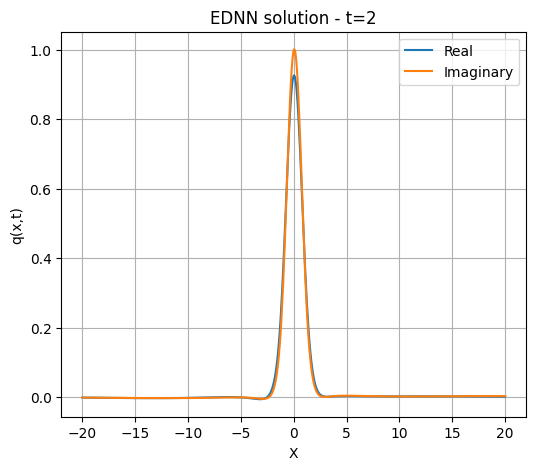

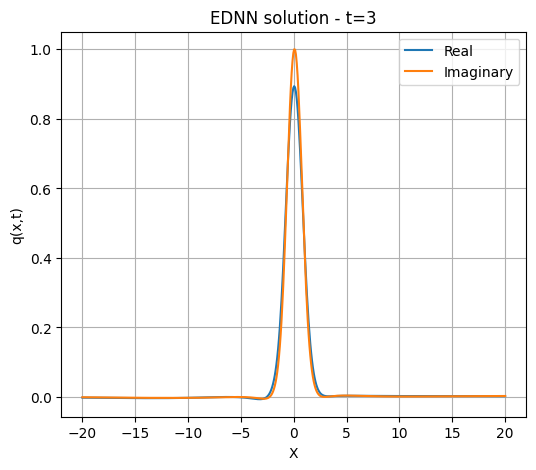

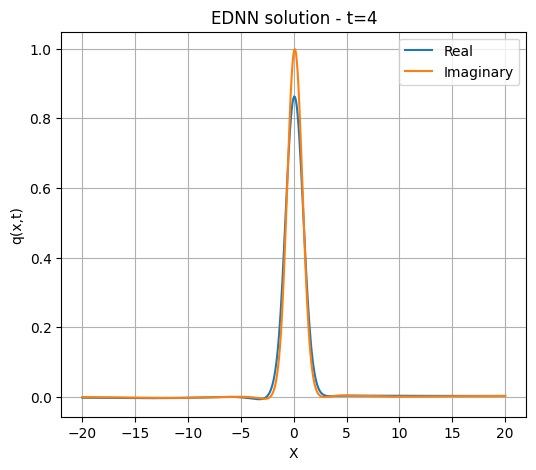

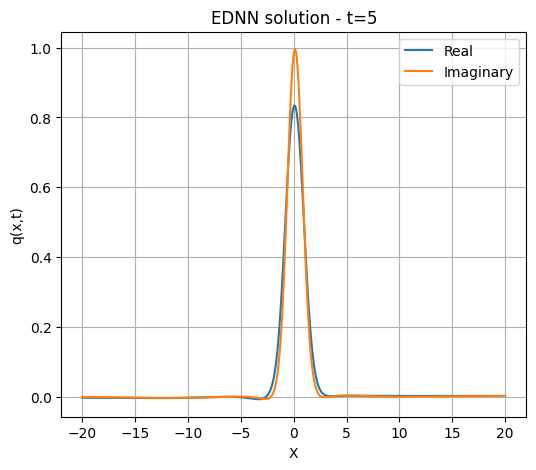

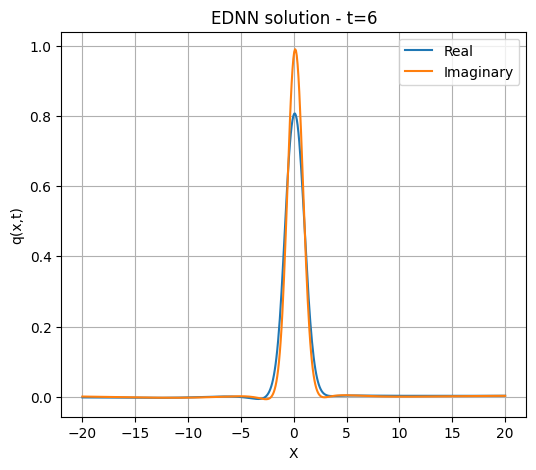

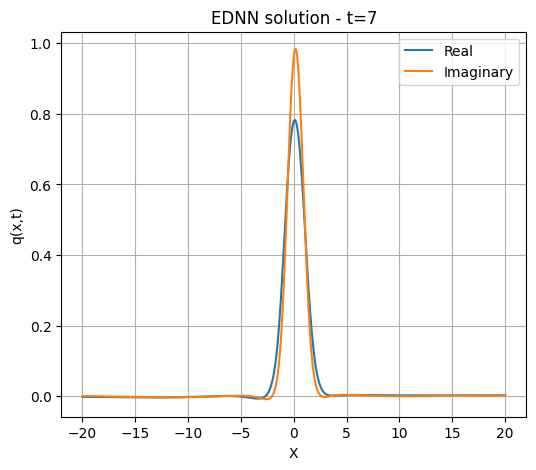

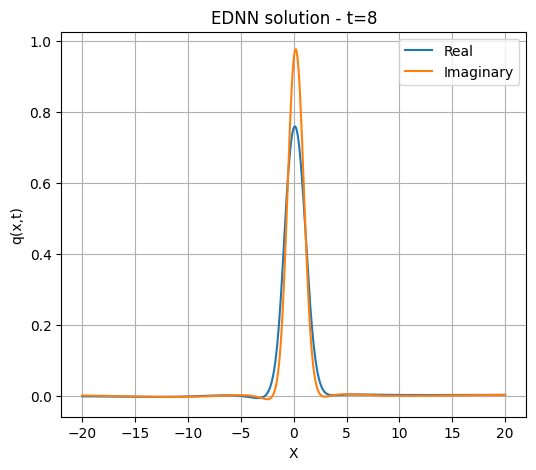

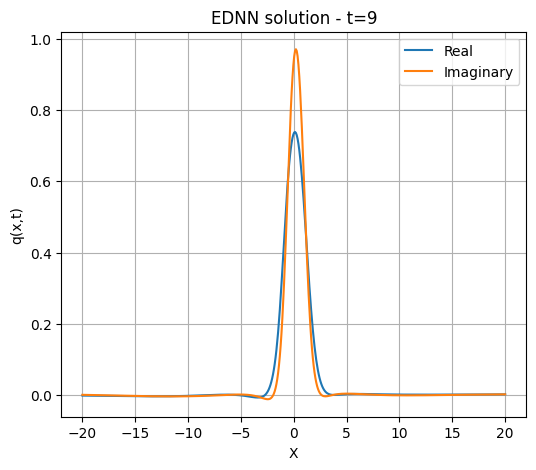

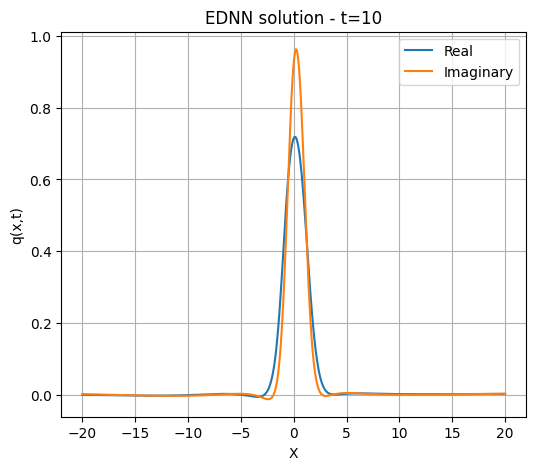

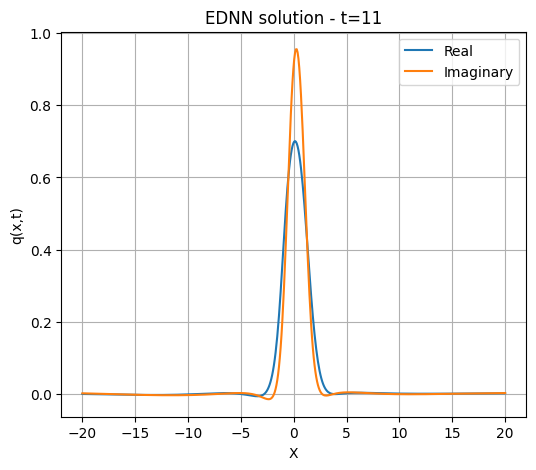

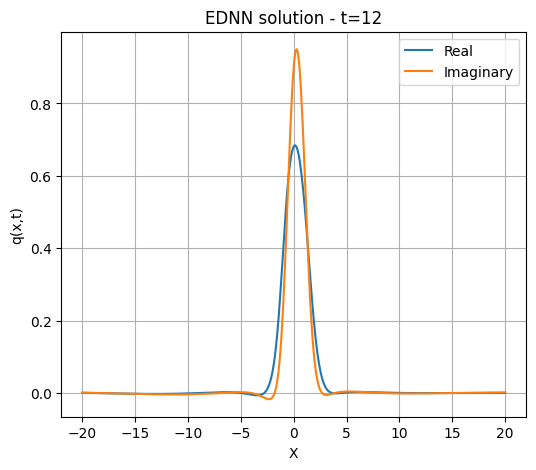

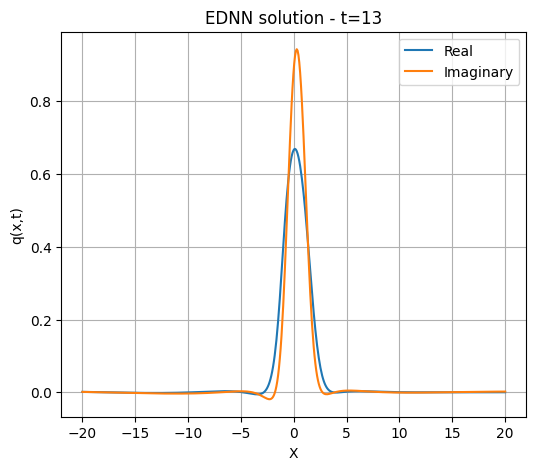

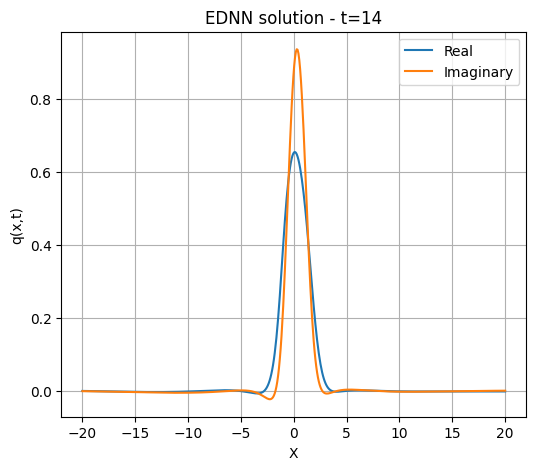

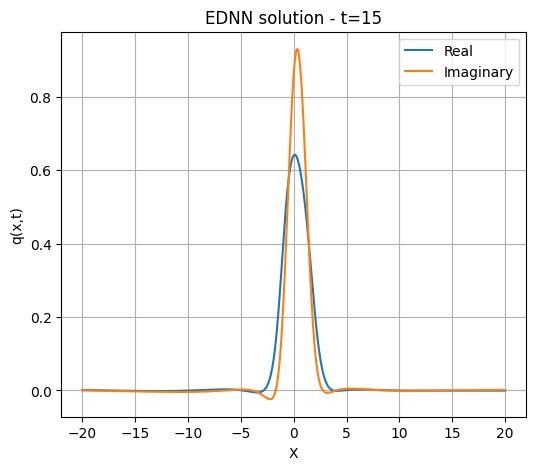

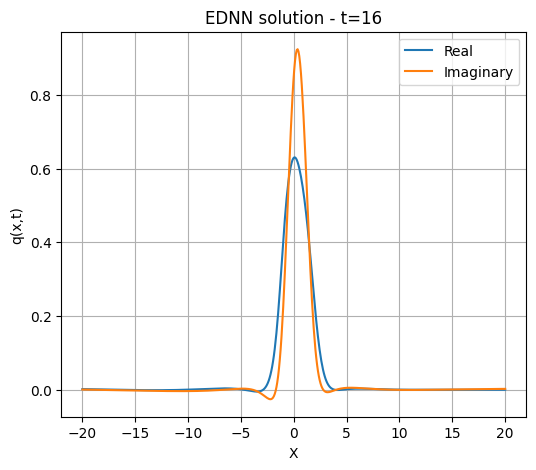

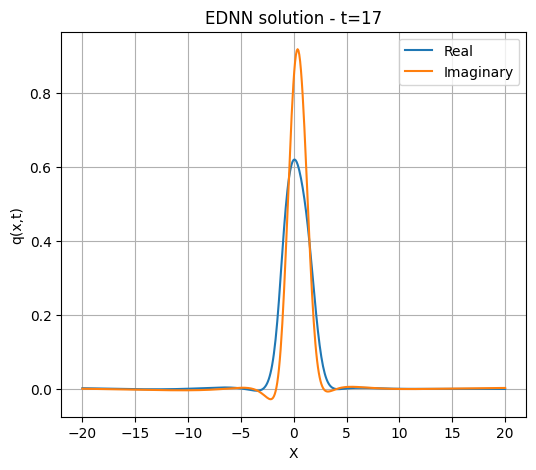

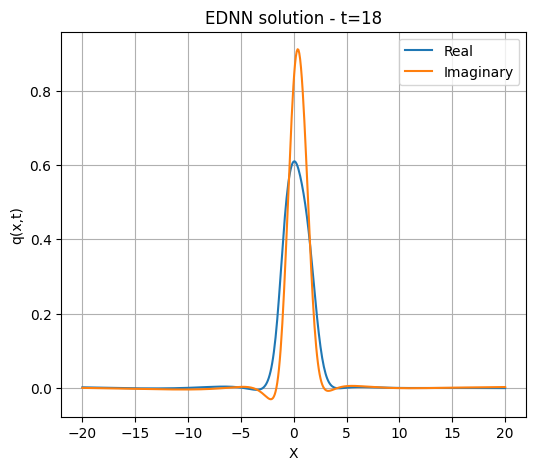

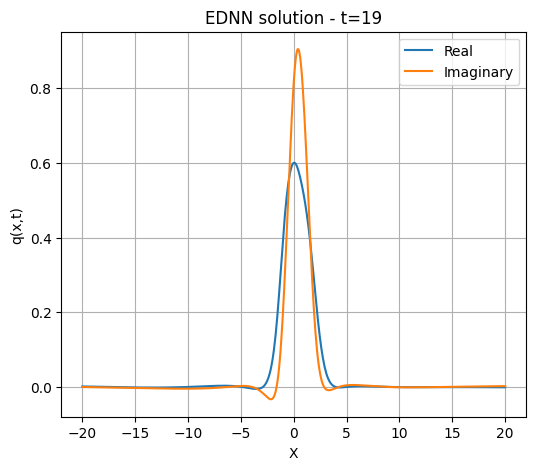

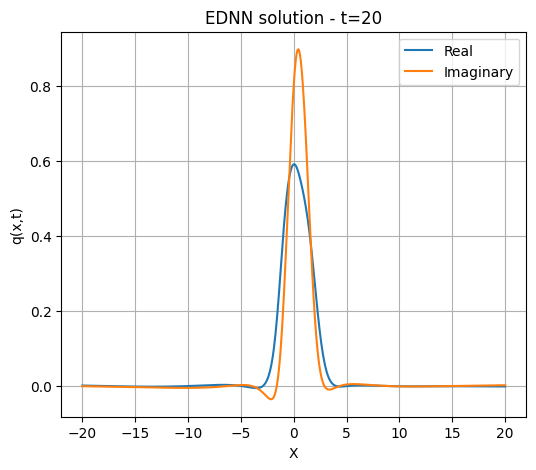

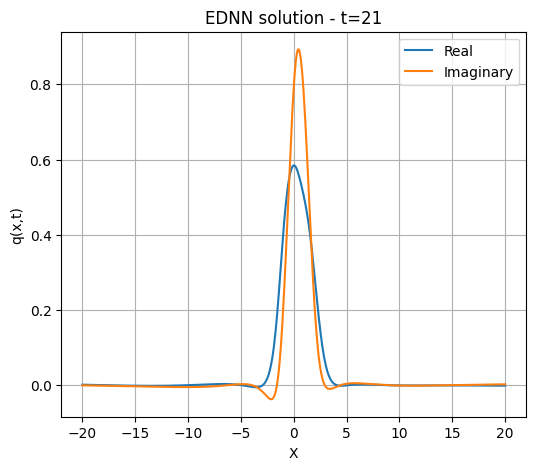

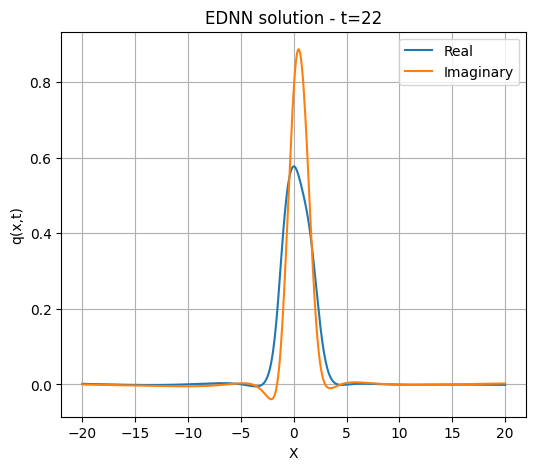

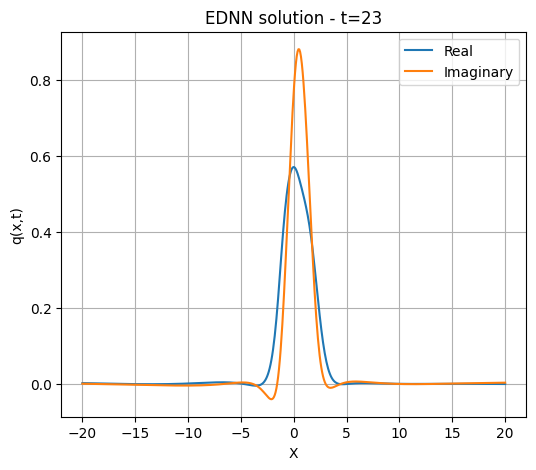

In [251]:
for i in range(1,len(u_list)):    
    x = np.load(x_list[i],allow_pickle=True)
    u = np.load(u_list[i],allow_pickle=True)
    v = np.load(v_list[i],allow_pickle=True)
    
    fig = plt.figure(figsize=(6,5))
    ax = fig.add_subplot(111)
    ax.grid()

    # Surface Plot
    ax.plot(x,u)
    ax.plot(x,v)

    # Labels
    ax.legend(['Real', 'Imaginary'])
    ax.set_xlabel('X')
    ax.set_ylabel('q(x,t)')
    plt.title("EDNN solution - t={el}".format(el=i))
    # Save
    #plt.savefig(f'q_{i}.png')
    #plt.cla()

Text(0, 0.5, 'Value')

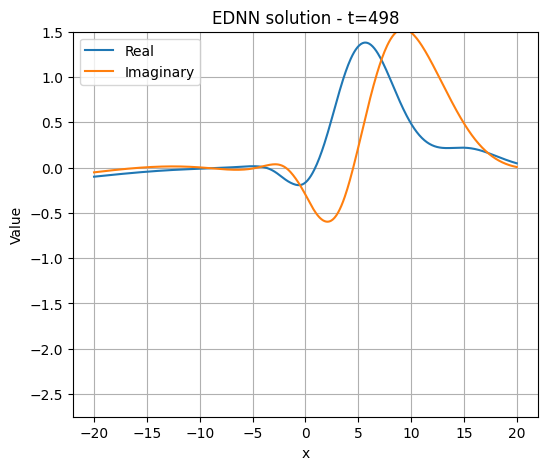

In [258]:
u = np.load(u_list[-1],allow_pickle=True)
v = np.load(v_list[-1],allow_pickle=True)
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
ax.grid()
# Surface Plot
plt.ylim(-2.75,1.5)
ax.plot(X,u)
ax.plot(X,v)

ax.legend(['Real', 'Imaginary'])

# Labels
plt.title("EDNN solution - t={}".format(len(u_list)))
ax.set_xlabel('x')
ax.set_ylabel('Value')

In [208]:
z = np.stack([np.load(u_list[i],allow_pickle=True) for i in range(len(u_list))])

Text(0.5, 0, 'u')

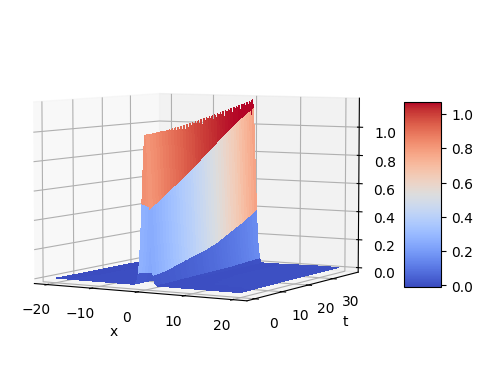

In [209]:
fig = plt.figure()
ax = plt.axes(projection='3d')
# Make data.
x = X
t = np.arange(0, len(u_list), 1)
x, t = np.meshgrid(x, t)
z = z

# Plot the surface.
surf = ax.plot_surface(x, t, z,cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.view_init(5, -60)
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')

Text(0, 0.5, 't')

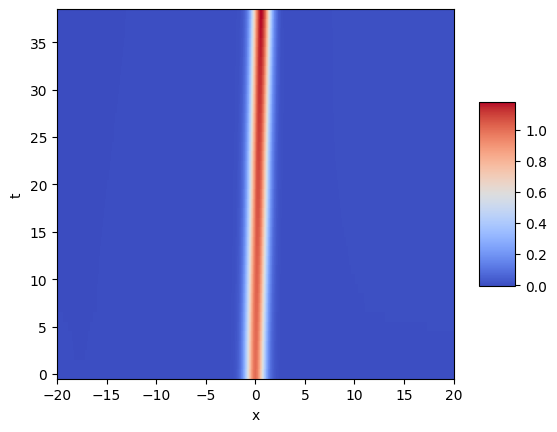

In [210]:
fig = plt.figure()
ax = plt.axes()
# Make data.
x = X
t = np.arange(0, len(u_list), 1)
x, t = np.meshgrid(x, t)
z = z

# Plot the surface.
surf = ax.pcolormesh(x, t, z,cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('x')
ax.set_ylabel('t')


In [194]:
import xarray as xr

In [195]:
ds_disk = xr.open_dataset("./plot/result/finite_diff/saved_on_disk.nc")

In [196]:
data = ds_disk.copy()

In [197]:
data['U'][100]

<xarray.DataArray 'U' (x: 1000)>
[1000 values with dtype=float64]
Coordinates:
    t        float64 1.0
  * x        (x) float32 -20.0 -19.96 -19.92 -19.88 ... 19.88 19.92 19.96 20.0

In [199]:
u = np.load(u_list[10],allow_pickle=True)
u[0]

-0.0031704735

In [200]:
s=0
for i in range(1,len(u_list)):    
    u_ednn = np.load(u_list[i],allow_pickle=True)
    u_fd = data['U'][i]
    err = np.square(u_fd-u_ednn)
    mean=np.mean(err)
    rmse = np.sqrt(mean)
    s+=rmse
print(s)

<xarray.DataArray 'U' ()>
array(0.88806945)
Coordinates:
    t        float64 0.01


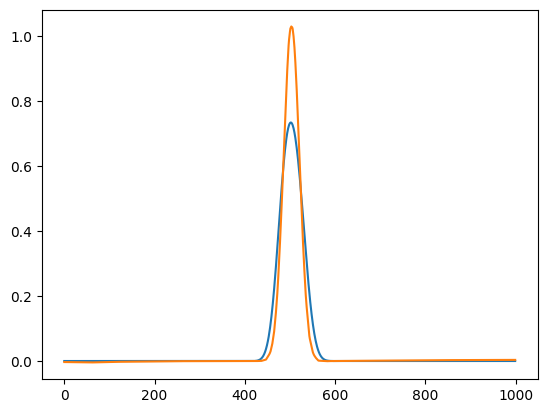

In [202]:
plt.plot(data['U'][10])
plt.plot(u)